<a href="https://colab.research.google.com/github/SrihithaParvathaneni19/fmml-project-/blob/main/Module%2004%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


In [3]:
numpu

NameError: name 'numpu' is not defined

# Notebook Imports and Packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [9]:
def f(x):
    return x ** 2 + x + 1

In [10]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

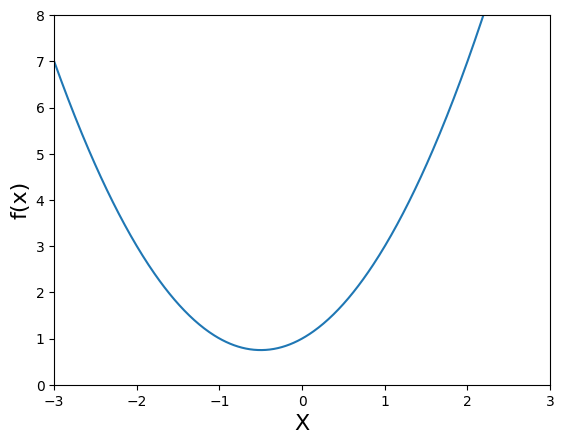

In [11]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [12]:
def df(x):
    return 2 * x + 1

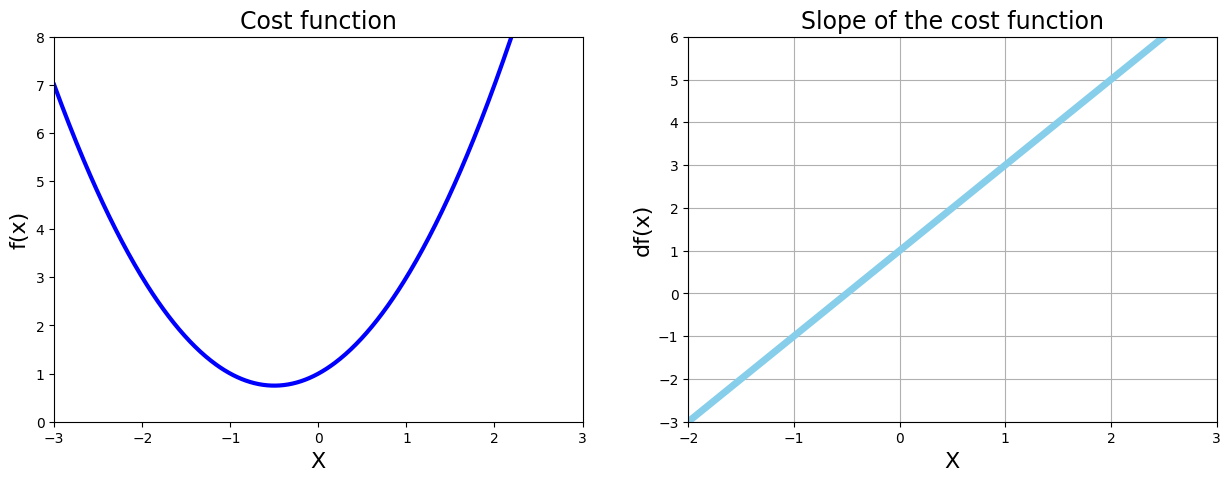

In [13]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [14]:
import numpy as np


In [15]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


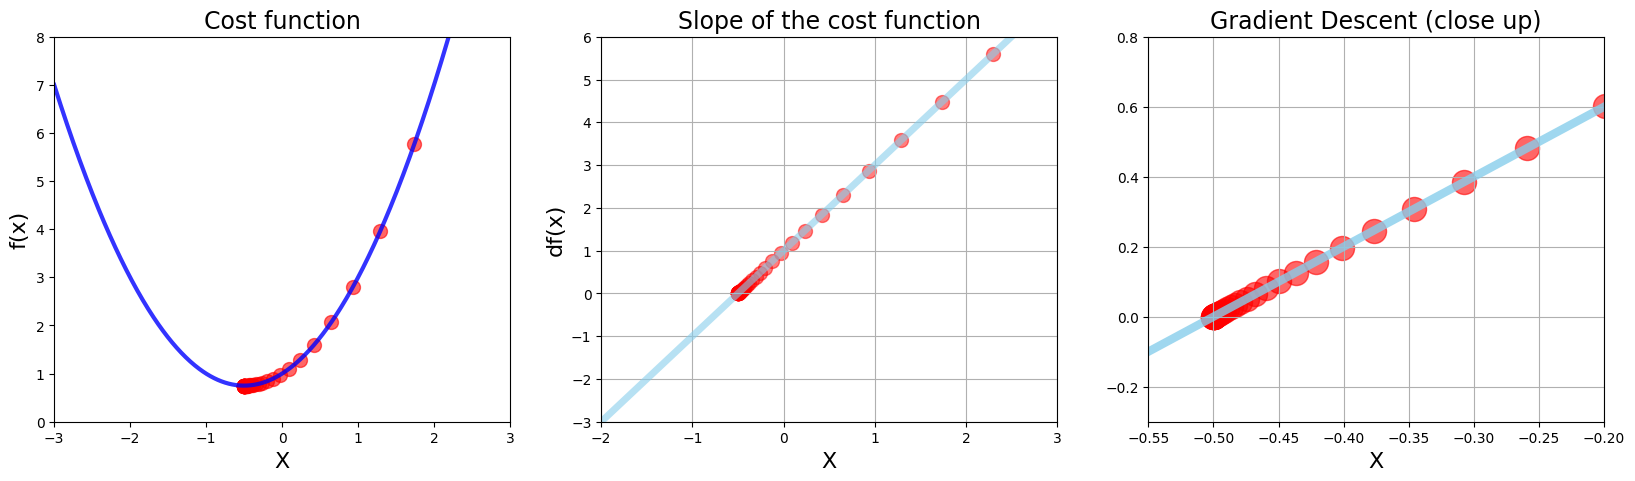

In [16]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [17]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return x**3 - 8*x

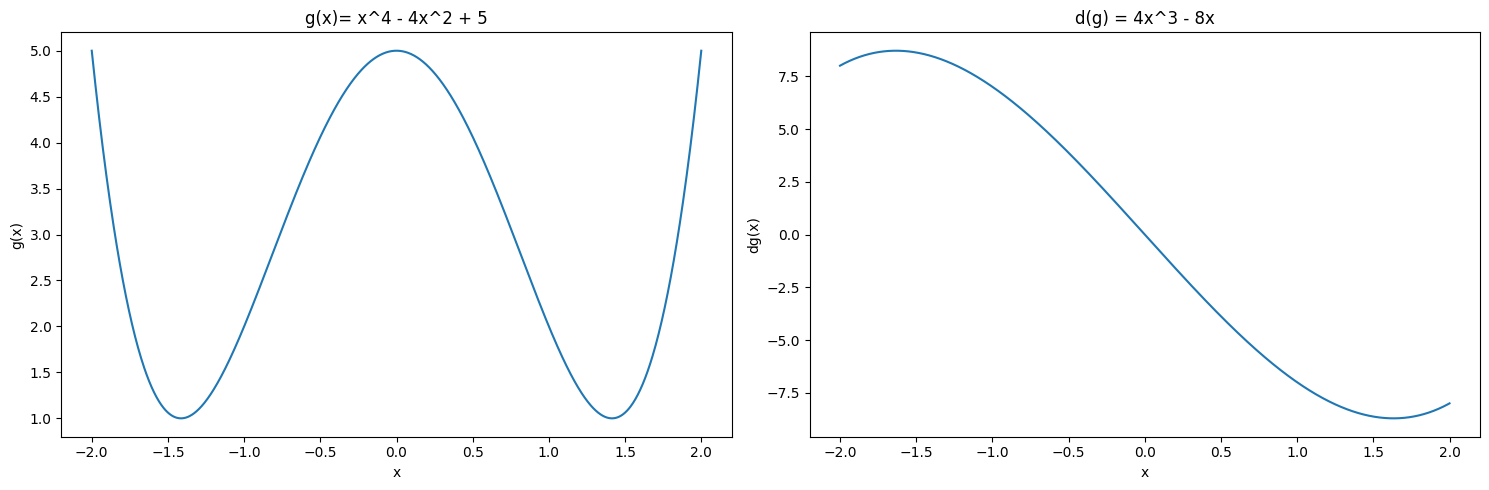

In [18]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
#calculating the function and derivative values
y_2 = g(x_2)
dy_2 = dg(x_2)

#creates a plot
plt.figure(figsize=[15, 5])

#subplot for g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, y_2)
plt.title('g(x)= x^4 - 4x^2 + 5')
plt.xlabel('x')
plt.ylabel('g(x)')

#subplot for f(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dy_2)
plt.title('d(g) = 4x^3 - 8x')
plt.xlabel('x')
plt.ylabel('dg(x)')

plt.tight_layout()
plt.show()

## Gradient Descent

In [19]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [20]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 2.826636172260267
Number of steps: 30


In [21]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.8279300478478295
Number of steps: 69


In [22]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -2.826686639073566
Number of steps: 41


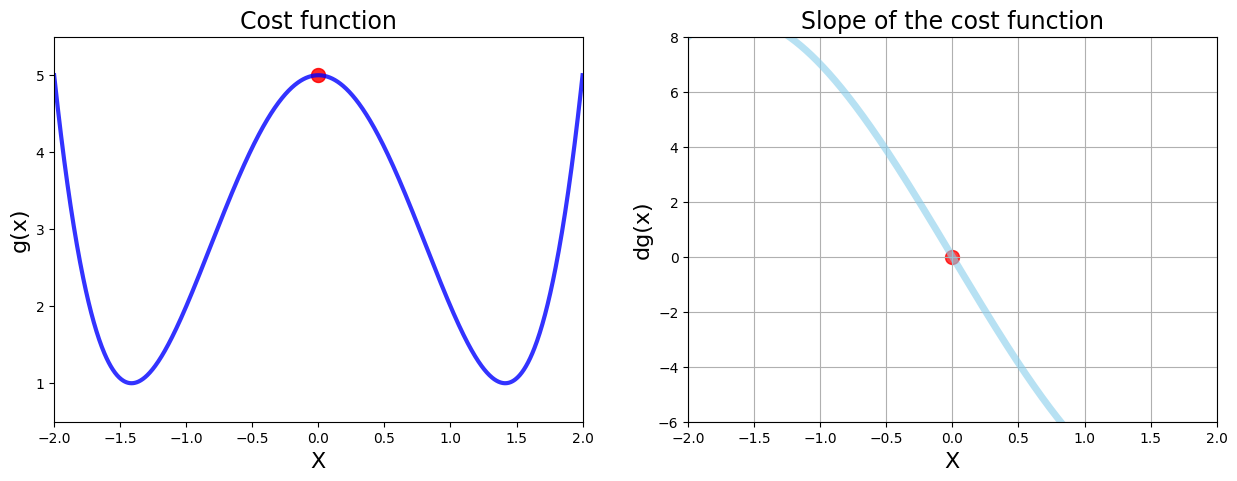

In [23]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
## TASK-4 : Code the same things as they were done for the first two examples

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or dg(x) value at this point is: 3.499800175741059
g(x) value or cost at this point is: 4.062639866281167


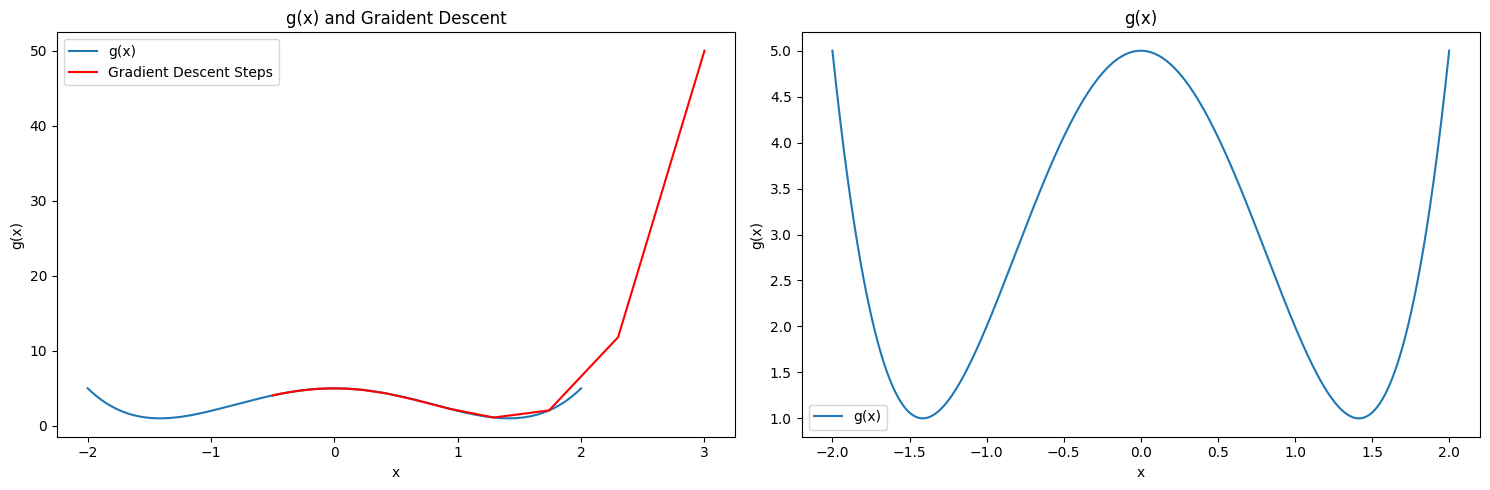

In [26]:
#Task 4 Answer :
#Task 4 Answer :
import matplotlib.pyplot as plt
import numpy as np

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

#Graidient Descent for g(x)
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)


    x_list.append(new_x)
    slope_list.append(dg(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or dg(x) value at this point is:', dg(new_x))
print('g(x) value or cost at this point is:', g(new_x))

#visualization
plt.figure(figsize=[15, 5])

#subploting for g(x) with gradient descent path
plt.subplot(1,2,1)
# The label argument should be passed to plt.plot, not g(x)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(x_list, g(np.array(x_list)), color='red', label='Gradient Descent Steps')
plt.title('g(x) and Graident Descent')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

#subplot for g(x)
plt.subplot(1,2,2)
plt.plot(x_2, g(x_2), label='g(x)')
plt.title('g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.tight_layout()
plt.show()

#### Learning Rate

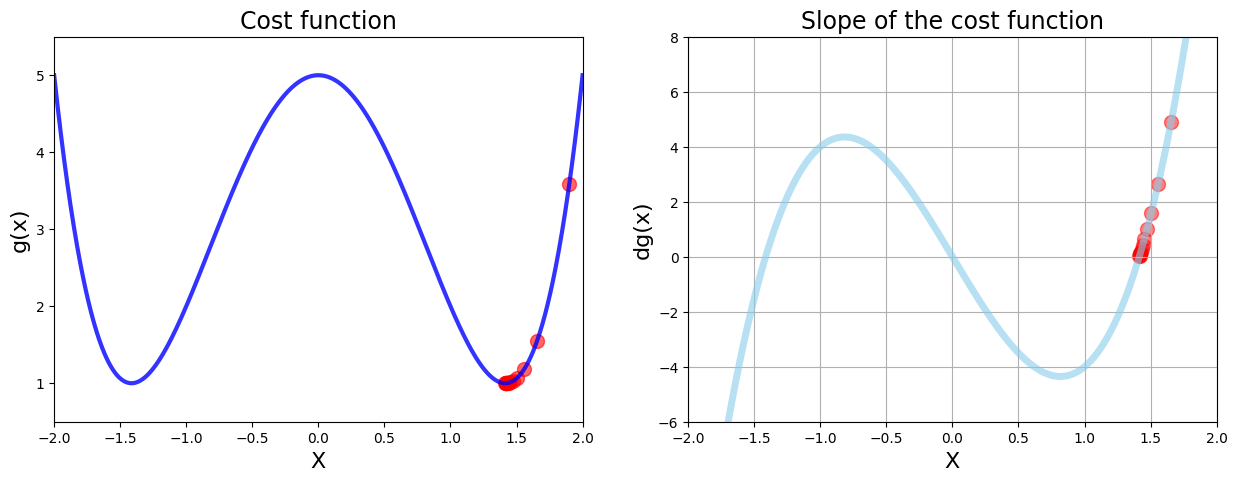

Number of steps is:  14


In [27]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

Intial guess: 0.5,local minimum: 1.4122375085019094
Intial guess: -0.5,local minimum: -1.4122375085019094
Intial guess: 1.5,local minimum: 1.4158097995595096


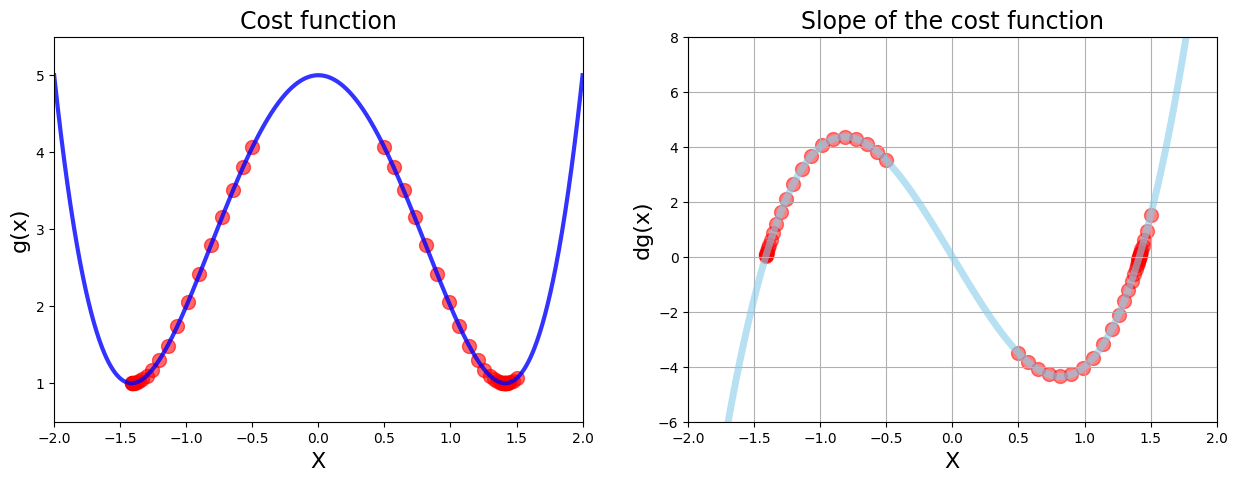

In [29]:
## TASK-5 : Run gradient descent 3 times
#Task-5 Answer
import matplotlib.pyplot as plt
import numpy as np

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

#Graident Descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    # Fixed: changed 'graidient' to 'gradient'
    new_x = previous_x - multiplier * gradient

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      break

  return new_x, x_list, slope_list

# Moved the following block outside the gradient_descent function
#running gradient descent 3 times with different initial guesses
initial_guesses = [0.5, -0.5, 1.5] # Fixed: Changed 'intial_guesses' to 'initial_guesses'
local_mins = []
x_lists = []
deriv_lists = []

# Fixed: Changed 'intial_guesses' to 'initial_guesses' and 'intial_guess' to 'initial_guess'
for initial_guess in initial_guesses:
    local_min, x_list, deriv_list = gradient_descent(dg, initial_guess)
    local_mins.append(local_min)
    x_lists.append(x_list)
    deriv_lists.append(deriv_list)

    print(f"Intial guess: {initial_guess},local minimum: {local_min}")

#visualization
x_2 = np.linspace(-2, 2, 1000)

plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

for x_list in x_lists:
    plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)

for x_list, deriv_list in zip(x_lists, deriv_lists):
    plt.scatter(x_list, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

In [30]:
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

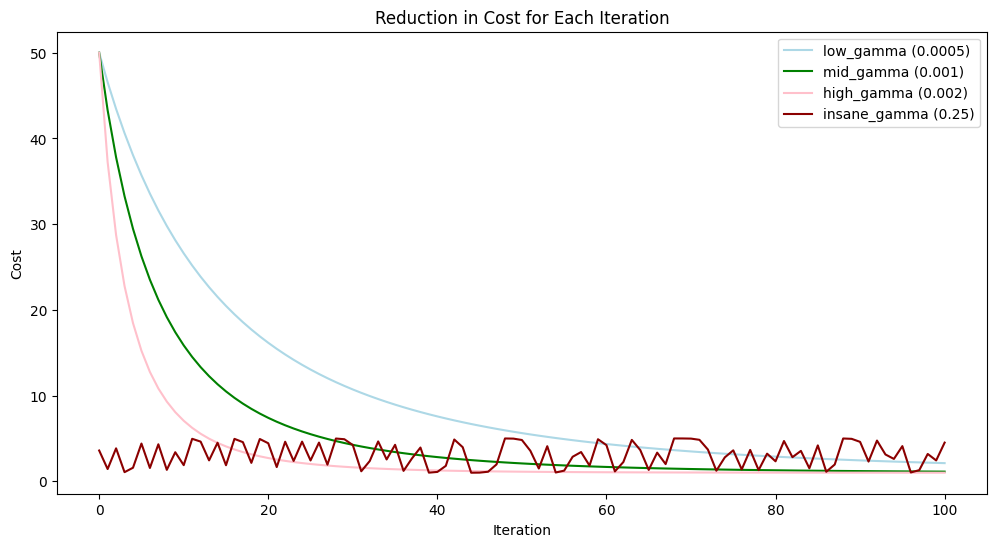

In [31]:
## TASK-7 : Plot reduction in cost for each iteration
import matplotlib.pyplot as plt
import numpy as np

#plotting reduction in cost for each iteration
plt.figure(figsize=[12, 6])

#plotting for low_gamma
plt.plot(range(len(low_gamma[1])),g(np.array(low_gamma[1])), label='low_gamma (0.0005)', color='lightblue')

#plotting for mid_gamma
plt.plot(range(len(mid_gamma[1])),g(np.array(mid_gamma[1])), label='mid_gamma (0.001)', color='green')

#plotting for high_gamma
plt.plot(range(len(high_gamma[1])),g(np.array(high_gamma[1])), label='high_gamma (0.002)', color='pink')

#plotting for insane_gamma
plt.plot(range(len(insane_gamma[1])),g(np.array(insane_gamma[1])), label='insane_gamma (0.25)', color='darkred')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Reduction in Cost for Each Iteration')
plt.legend()
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

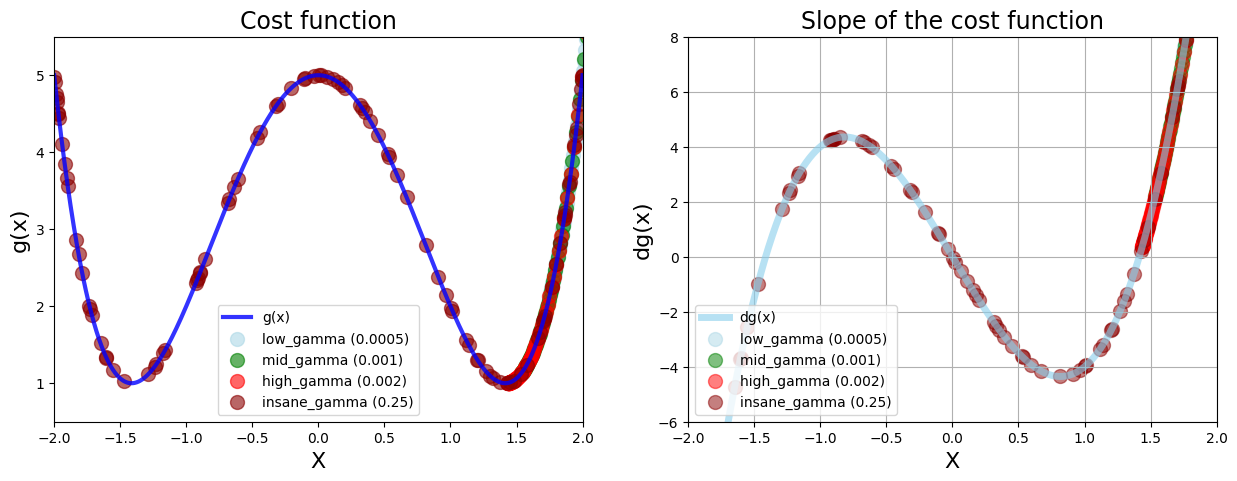

In [33]:
## TASK-8 : Code the same things as they were done for the first two examples

#Visualazation of different learning rates
x_2 = np.linspace(-2, 2, 1000)

#figure and subplots
# Fixed: Changed 'plt.subplot' to 'plt.subplots' and moved 'figsize' to 'plt.figure'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])

#subplot 1 : Cost function and descent paths
ax1.set_xlim(-2, 2)
ax1.set_ylim(0.5, 5.5)
ax1.set_title('Cost function', fontsize=17)
ax1.set_xlabel('X', fontsize=16)
ax1.set_ylabel('g(x)', fontsize=16)

ax1.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8, label='g(x)')

# Plotting the  descent paths for different learning rates
ax1.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='lightblue', s=100, alpha=0.6, label='low_gamma (0.0005)')
ax1.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='green', s=100, alpha=0.6, label='mid_gamma (0.001)')
ax1.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='red', s=100, alpha=0.6, label='high_gamma (0.002)')
ax1.scatter(insane_gamma[1], g(np.array(insane_gamma[1])), color='darkred', s=100, alpha=0.6, label='insane_gamma (0.25)')
ax1.legend()

# Subplot 2: Slope of the cost function and derivative values
ax2.set_title('Slope of the cost function', fontsize=17)
ax2.set_xlabel('X', fontsize=16)
ax2.set_ylabel('dg(x)', fontsize=16)
ax2.grid()
ax2.set_xlim(-2, 2)
ax2.set_ylim(-6, 8)

ax2.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6, label='dg(x)')

# Plot derivative values for different learning rates
ax2.scatter(low_gamma[1], low_gamma[2], color='lightblue', s=100, alpha=0.5, label='low_gamma (0.0005)')
ax2.scatter(mid_gamma[1], mid_gamma[2], color='green', s=100, alpha=0.5, label='mid_gamma (0.001)')
ax2.scatter(high_gamma[1], high_gamma[2], color='red', s=100, alpha=0.5, label='high_gamma (0.002)')
ax2.scatter(insane_gamma[1], insane_gamma[2], color='darkred', s=100, alpha=0.5, label='insane_gamma (0.25)')
ax2.legend()

plt.show()

In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

**bold text**### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = 2x+2y [REQUIRED]

#### $$\frac{\partial f}{\partial y} = 2xy + 2y + 1 $$

In [35]:
from sympy import symbols,diff

In [38]:
def f_sympy(x,y):
    a, b = symbols('x, y') # This line and subsequent lines within the function should be indented
    print('Our cost function f(x, y) is: ', f(a, b))
    print('Partial derivative wrt x is: ', diff(f(a, b), b))
    print('Value of f(x,y) at x=1.8 y=1.0 is: ',
          f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
    print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [41]:
from sympy import symbols, diff
import numpy as np

## Defining the cost function
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 2.5)**2

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess
a, b = symbols('x, y')  # Define symbols outside the loop

for n in range(max_iter):
    # Pass params as a single argument to f
    gradient_x = diff(f([a, b]), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f([a, b]), b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params))  # Pass params as a single argument to f

Values in gradient array [8.88178419700125e-16 -1.55431223447522e-15]
Minimum occurs at x value of:  1.00000000000000
Minimum occurs at y value of:  2.50000000000000
The cost is:  1.97215226305253e-30


In [42]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return 2 * (x - 1)

def fpy(x, y):
    return 2 *(y - 2.5)

In [44]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params))

Values in gradient array [ 8.88178420e-16 -1.77635684e-15]
Minimum occurs at x value of:  1.0000000000000004
Minimum occurs at y value of:  2.499999999999999
The cost is:  9.860761315262648e-31




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.847535148603
Theta 1: 1.22272646378


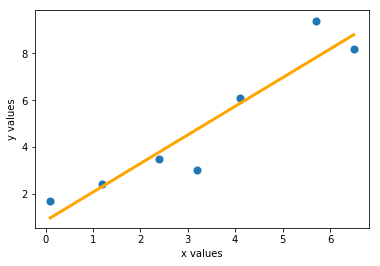

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[ 0.96980779]
 [ 2.31480691]
 [ 3.78207866]
 [ 4.76025983]
 [ 5.86071365]
 [ 7.81707599]
 [ 8.79525716]]
In comparison, the actual y values are 
 [[ 1.7]
 [ 2.4]
 [ 3.5]
 [ 3. ]
 [ 6.1]
 [ 9.4]
 [ 8.2]]


In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [ 0.94796558]
MSE regression using manual calc is 0.947965575979
MSE regression is 0.947965575979


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


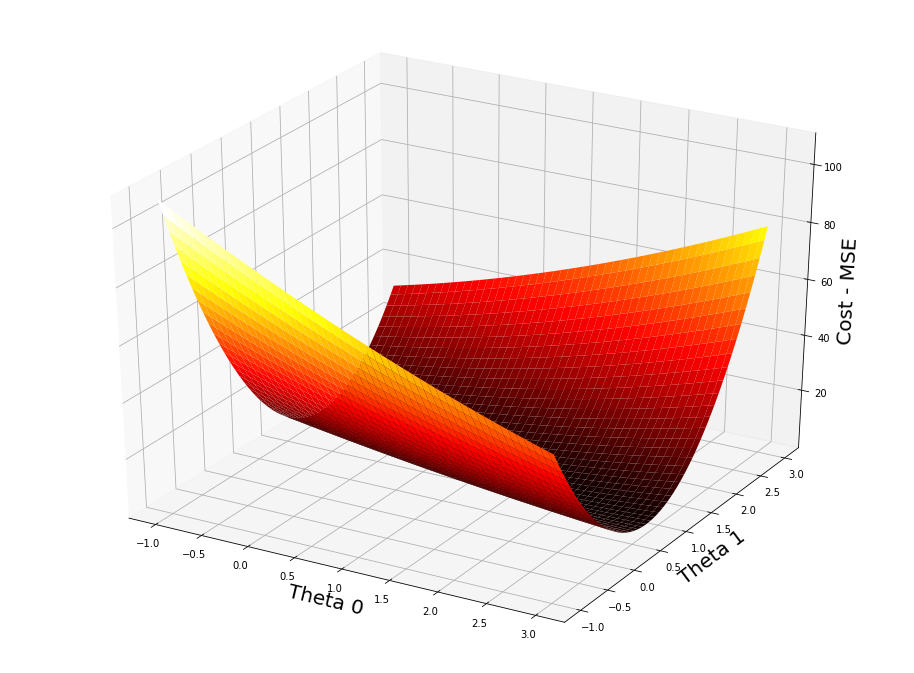

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.948382652675
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643
Min MSE for Theta 1 at plot_t1[111][91] 1.23115577889


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.853223046174
Min occurs at Theta 1: 1.22149353326
MSE is: [ 0.94797511]


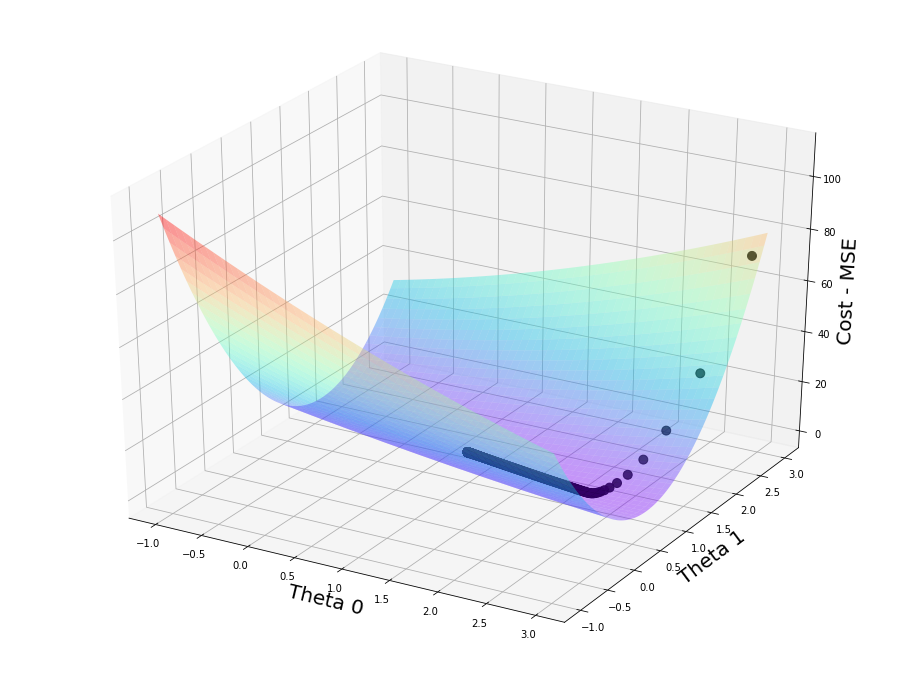

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()